# EMPLOYEE PROMOTION:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv("C:/Projects/Employee_Promotion/train_LZdllcl (2).csv")
test = pd.read_csv("C:/Projects/Employee_Promotion/test_2umaH9m (2).csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


# EDA PROCESS:

In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train.skew()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\3574648760.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64

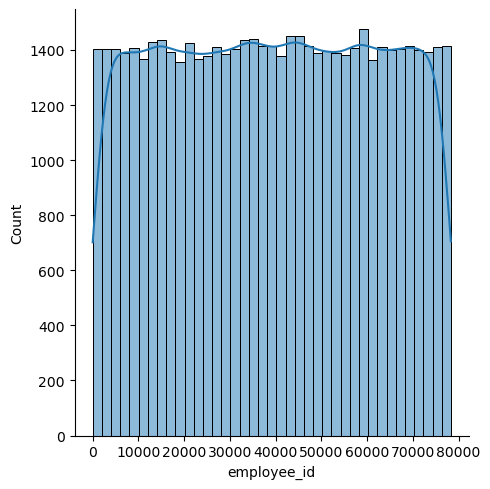

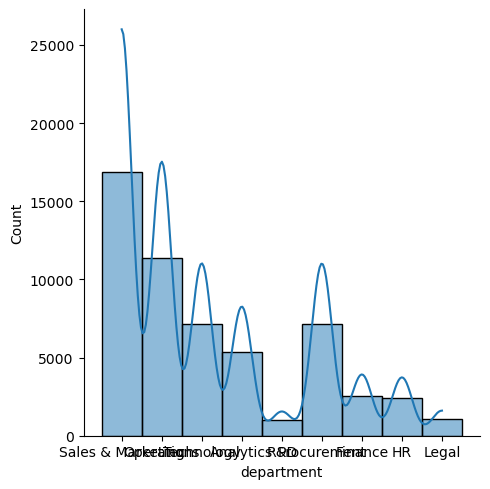

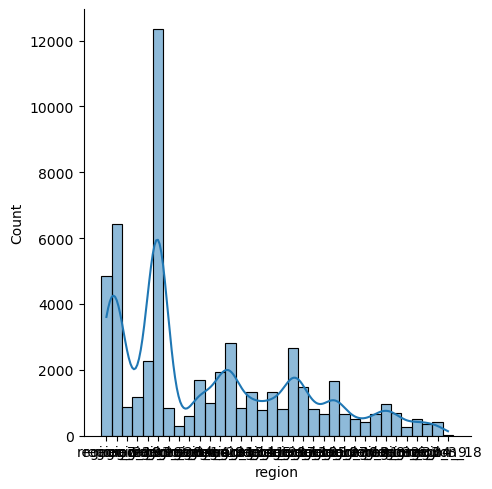

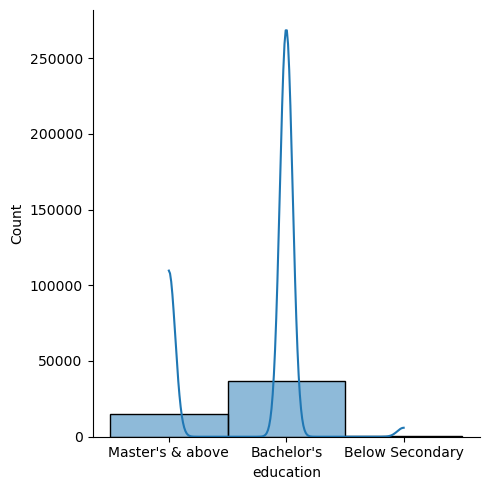

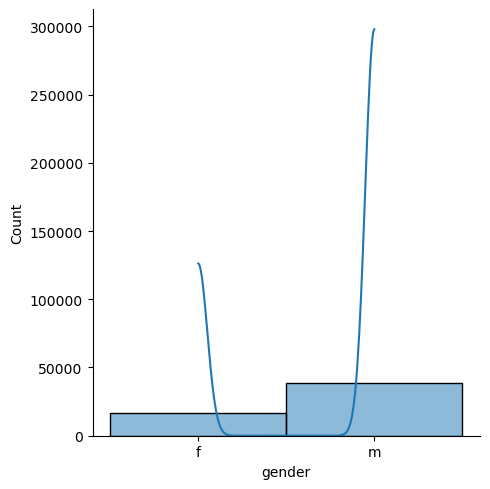

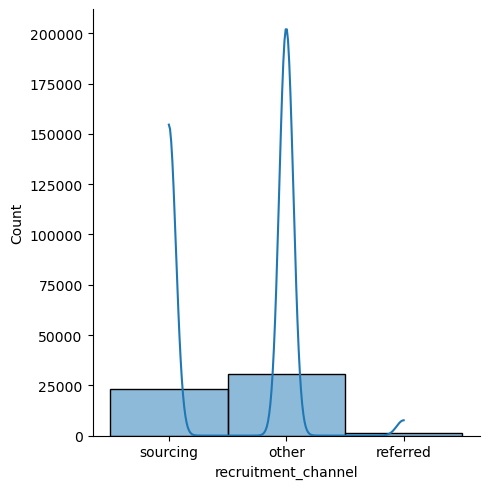

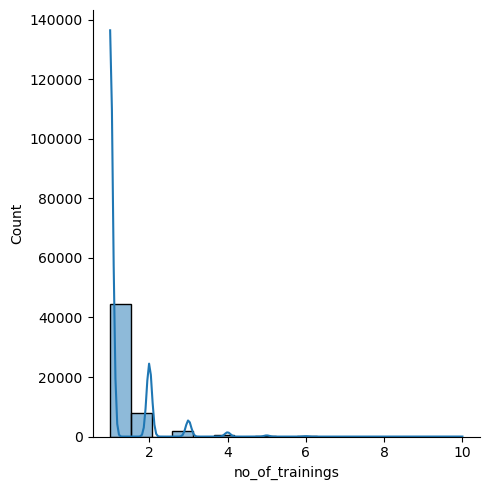

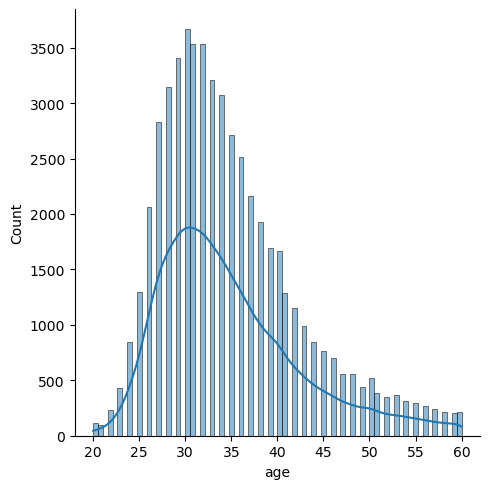

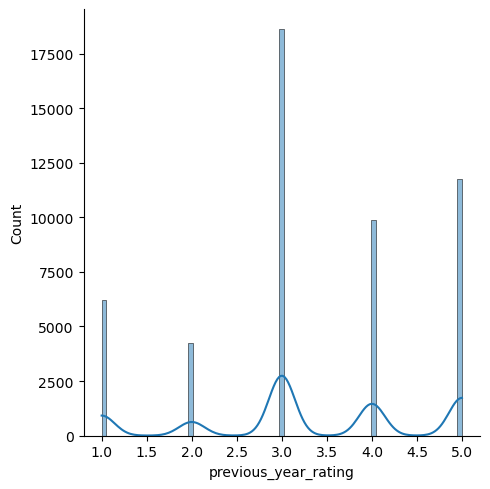

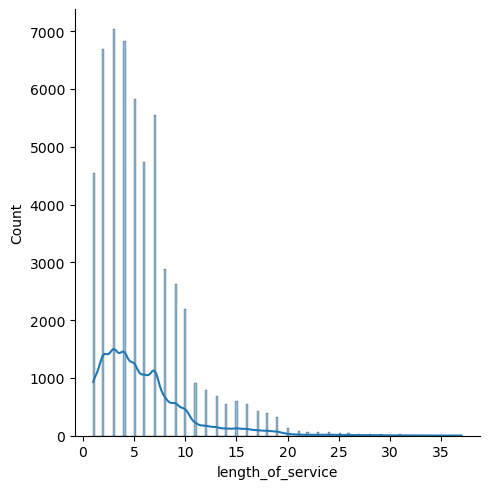

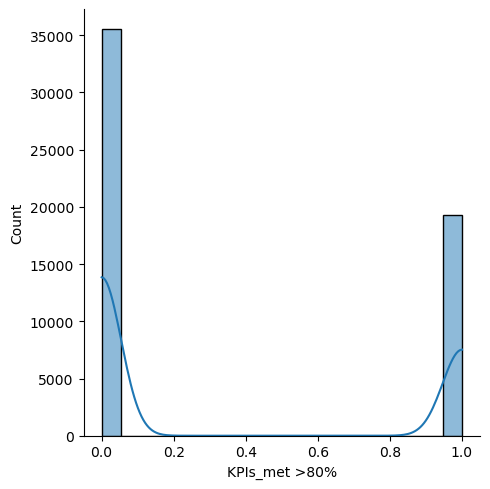

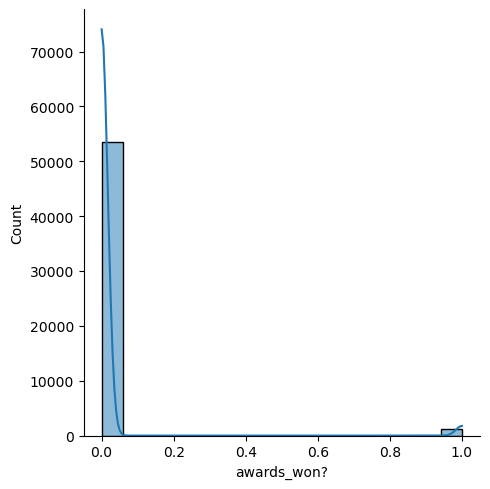

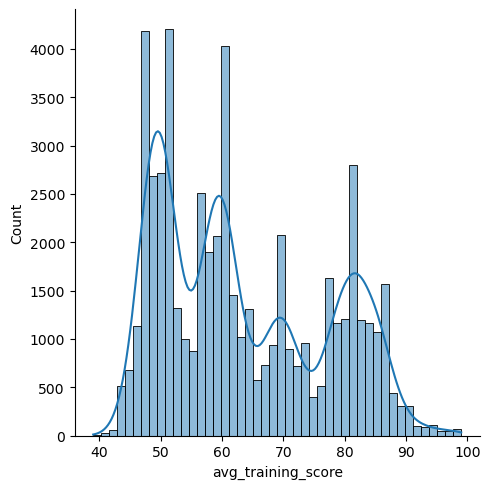

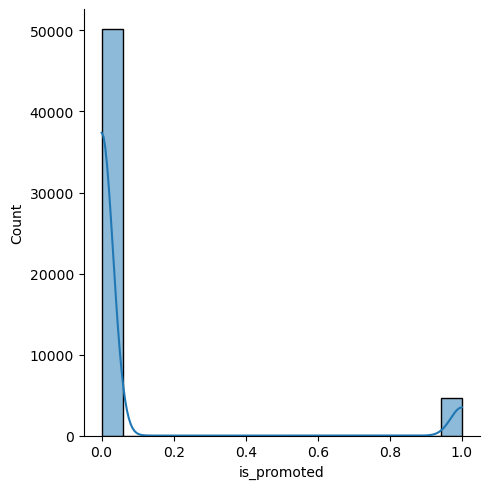

In [7]:
for i in train.columns:
    sns.displot(train[i] , kde = True)

<Axes: >

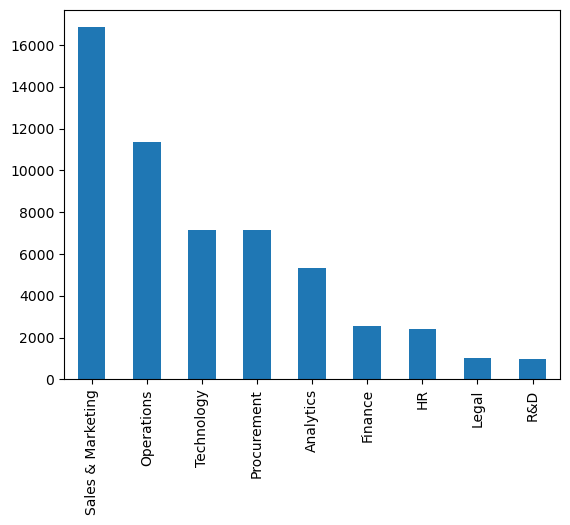

In [8]:
train['department'].value_counts().plot(kind = 'bar')

<Axes: >

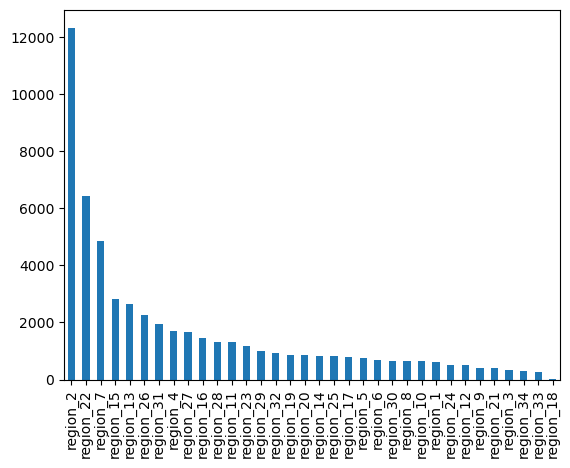

In [9]:
train['region'].value_counts().plot(kind = 'bar')

<Axes: >

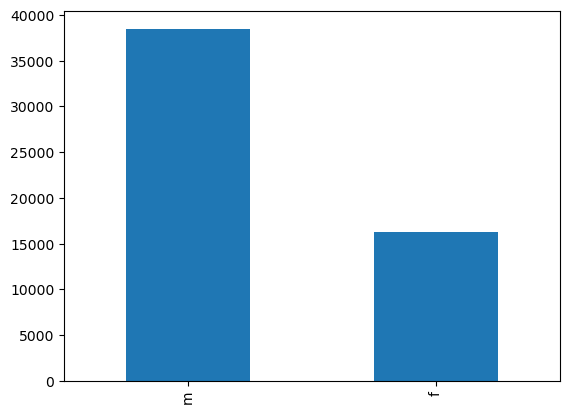

In [10]:
train['gender'].value_counts().plot(kind = 'bar')

<Axes: >

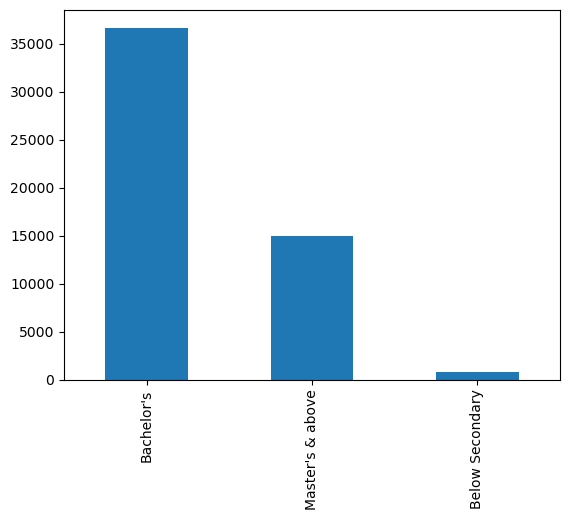

In [11]:
train['education'].value_counts().plot(kind = 'bar')

<Axes: >

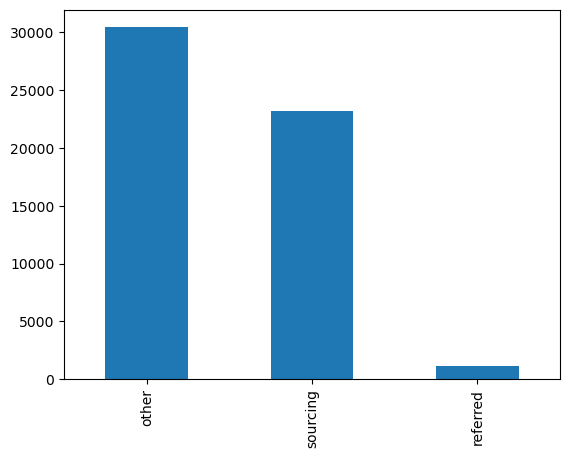

In [12]:
train['recruitment_channel'].value_counts().plot(kind = 'bar')

# Bi-Variate Analysis:

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

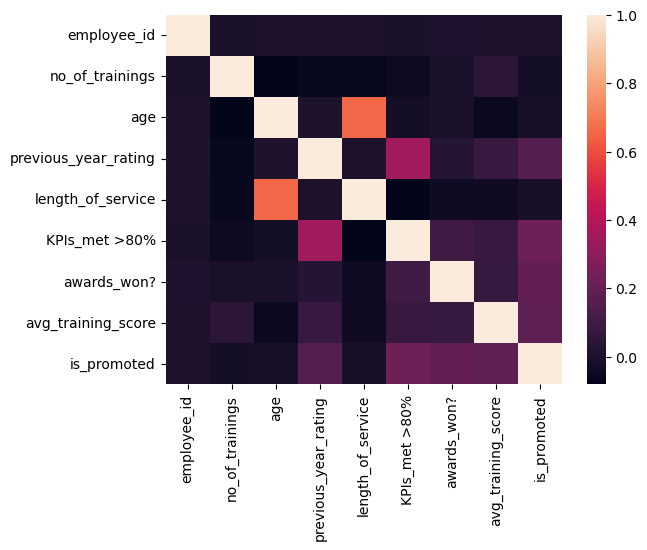

In [13]:
sns.heatmap(train.corr())

# TRUTH OR SAMPLING ERROR: 

In [14]:
from scipy.stats import chi2_contingency

In [15]:
def chi2_sq_test(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    _,pvalue,_,_ = chi2_contingency(contingency_table)
    if pvalue< 0.05:
        print('Accept the alternative hypothesis ', round(pvalue,2))
    else: 
        print('Don not Accept the alternative hypothesis', round(pvalue,2) )
    return contingency_table

In [16]:
chi2_sq_test(train['is_promoted'], train['gender'])

Accept the alternative hypothesis  0.01


gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [17]:
chi2_sq_test(train['is_promoted'], train['education'])

Accept the alternative hypothesis  0.0


education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,33661,738,13454
1,3008,67,1471


In [18]:
chi2_sq_test(train['is_promoted'], train['region'])

Accept the alternative hypothesis  0.0


region,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,552,597,1241,467,2418,765,2586,1363,687,30,...,1825,905,259,284,1457,731,658,4327,602,412
1,58,51,74,33,230,62,222,102,109,1,...,110,40,10,8,246,35,32,516,53,8


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [20]:
chi2_sq_test(train['is_promoted'], train['recruitment_channel'])

Accept the alternative hypothesis  0.0


recruitment_channel,other,referred,sourcing
is_promoted,,,
0,27890,1004,21246
1,2556,138,1974


In [21]:
chi2_sq_test(train['is_promoted'], train['no_of_trainings'])

Accept the alternative hypothesis  0.0


no_of_trainings,1,2,3,4,5,6,7,8,9,10
is_promoted,,,,,,,,,,
0,40468,7382,1654,442,125,42,12,5,5,5
1,3910,605,122,26,3,2,0,0,0,0


In [22]:
chi2_sq_test(train['is_promoted'], train['age'])

Accept the alternative hypothesis  0.0


age,20,21,22,23,24,25,26,27,28,29,...,51,52,53,54,55,56,57,58,59,60
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,109,93,213,394,775,1230,1897,2566,2839,3111,...,355,323,350,289,276,243,233,197,192,203
1,4,5,18,34,70,69,163,261,308,294,...,34,28,14,24,18,21,5,16,17,14


In [23]:
chi2_sq_test(train['is_promoted'], train['awards_won?'])

Accept the alternative hypothesis  0.0


awards_won?,0,1
is_promoted,,
0,49429,711
1,4109,559


In [24]:
chi2_sq_test(train['is_promoted'], train['length_of_service'])

Accept the alternative hypothesis  0.03


length_of_service,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,37
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,4170,6089,6424,6238,5357,4333,5087,2614,2400,1989,...,41,35,28,27,12,20,8,9,3,1
1,377,595,609,598,475,401,464,269,229,204,...,0,1,2,3,0,0,2,0,1,0


In [25]:
chi2_sq_test(train['is_promoted'], train['avg_training_score'])

Accept the alternative hypothesis  0.0


avg_training_score,39,40,41,42,43,44,45,46,47,48,...,90,91,92,93,94,95,96,97,98,99
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,2,5,25,60,169,325,650,1100,1667,2341,...,106,41,18,9,2,0,1,0,0,0
1,0,0,1,2,7,10,31,36,79,96,...,79,76,81,75,63,45,47,49,37,35


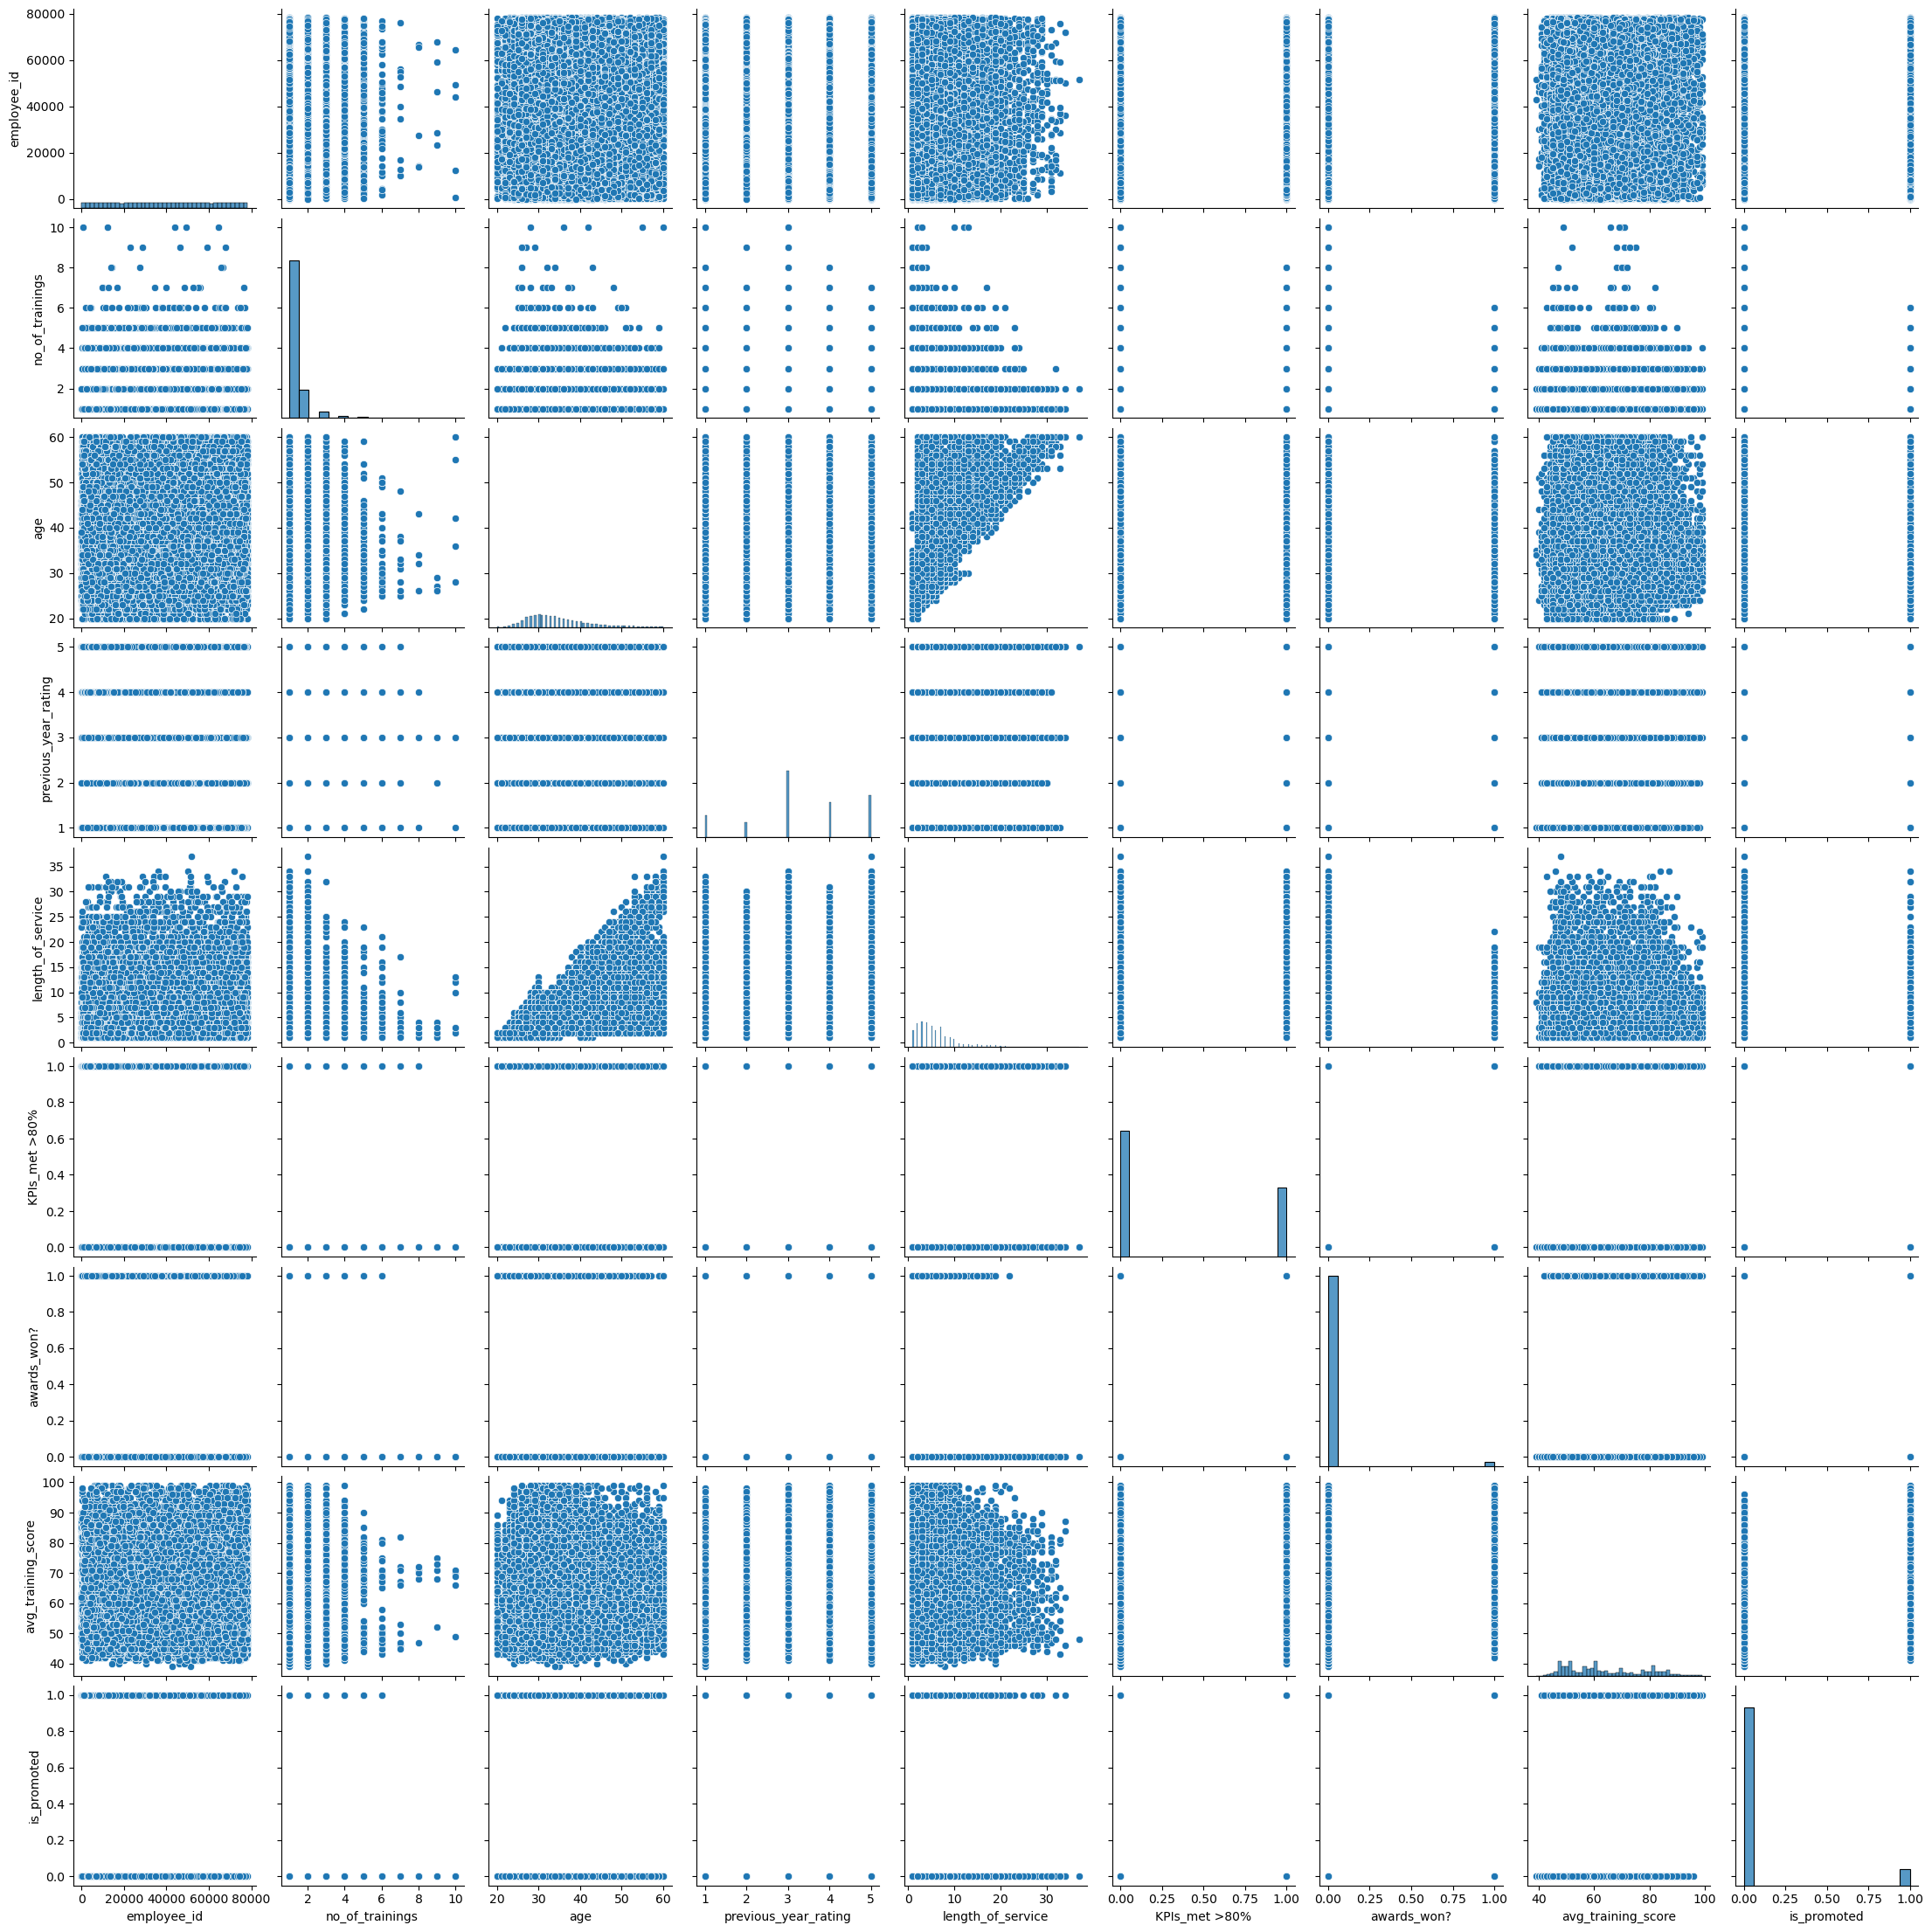

In [26]:
sns.pairplot(train)

# DATA PREPARATION:

In [27]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [28]:
train['education'] = np.where(train['education'].isna(),train['education'].mode(dropna = True)[0], train['education'])
train['previous_year_rating'] = np.where(train['previous_year_rating'].isna(), train['previous_year_rating'].median(skipna=True),train['previous_year_rating'])

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [30]:
train['previous_year_rating'] = train['previous_year_rating'].astype('int')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           54808 non-null  int64 
 1   department            54808 non-null  object
 2   region                54808 non-null  object
 3   education             54808 non-null  object
 4   gender                54808 non-null  object
 5   recruitment_channel   54808 non-null  object
 6   no_of_trainings       54808 non-null  int64 
 7   age                   54808 non-null  int64 
 8   previous_year_rating  54808 non-null  int32 
 9   length_of_service     54808 non-null  int64 
 10  KPIs_met >80%         54808 non-null  int64 
 11  awards_won?           54808 non-null  int64 
 12  avg_training_score    54808 non-null  int64 
 13  is_promoted           54808 non-null  int64 
dtypes: int32(1), int64(8), object(5)
memory usage: 5.6+ MB


# ONE HOT ENCODING:

In [32]:
train_enc = pd.get_dummies(train)

In [33]:
train_enc.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [34]:
train_enc.drop(['employee_id'],axis =1, inplace = True)

In [35]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   no_of_trainings               54808 non-null  int64
 1   age                           54808 non-null  int64
 2   previous_year_rating          54808 non-null  int32
 3   length_of_service             54808 non-null  int64
 4   KPIs_met >80%                 54808 non-null  int64
 5   awards_won?                   54808 non-null  int64
 6   avg_training_score            54808 non-null  int64
 7   is_promoted                   54808 non-null  int64
 8   department_Analytics          54808 non-null  uint8
 9   department_Finance            54808 non-null  uint8
 10  department_HR                 54808 non-null  uint8
 11  department_Legal              54808 non-null  uint8
 12  department_Operations         54808 non-null  uint8
 13  department_Procurement        5

# DIVIDING DATA:

In [36]:
y = train['is_promoted']
x = train_enc

In [37]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [38]:
print(x.shape)
print(y.shape)

(100280, 59)
(100280,)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 123)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80224, 59)
(20056, 59)
(80224,)
(20056,)


# LOGISTIC REGRESSION:

In [100]:
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)
y_hat_train_logreg = log_reg.predict(x_train)
y_hat_test_logreg = log_reg.predict(x_test)

C:\Users\DELL\anaconda3\downloads\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [102]:
model_eval(y_train, y_hat_train_logreg)

The accuracy of the model is: 0.89
[[36546  3399]
 [ 5403 34876]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     39945
           1       0.91      0.87      0.89     40279

    accuracy                           0.89     80224
   macro avg       0.89      0.89      0.89     80224
weighted avg       0.89      0.89      0.89     80224



In [103]:
model_eval(y_test, y_hat_test_logreg)

The accuracy of the model is: 0.89
[[9324  871]
 [1347 8514]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10195
           1       0.91      0.86      0.88      9861

    accuracy                           0.89     20056
   macro avg       0.89      0.89      0.89     20056
weighted avg       0.89      0.89      0.89     20056



# DECISION TREE:

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
y_hat_train_dtree=dtree.predict(x_train)

y_hat_test_dtree=dtree.predict(x_test)

In [98]:
model_eval(y_train, y_hat_train_dtree)

The accuracy of the model is: 1.0
[[39942     3]
 [   13 40266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       1.00      1.00      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [99]:
model_eval(y_test, y_hat_test_dtree)

The accuracy of the model is: 0.94
[[9450  745]
 [ 467 9394]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10195
           1       0.93      0.95      0.94      9861

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



# Random Forest:

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf=RandomForestClassifier()
#fit the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [94]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 1.0
[[39936     9]
 [    7 40272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       1.00      1.00      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [95]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.96
[[9990  205]
 [ 519 9342]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10195
           1       0.98      0.95      0.96      9861

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



# ADABOOST CLASSIFIER:

In [54]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [89]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [90]:
model_eval(y_train, y_train_ada)

The accuracy of the model is: 0.88
[[35991  3954]
 [ 5884 34395]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     39945
           1       0.90      0.85      0.87     40279

    accuracy                           0.88     80224
   macro avg       0.88      0.88      0.88     80224
weighted avg       0.88      0.88      0.88     80224



In [91]:
model_eval(y_test, y_hat_test_ada)

The accuracy of the model is: 0.88
[[9185 1010]
 [1398 8463]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     10195
           1       0.89      0.86      0.88      9861

    accuracy                           0.88     20056
   macro avg       0.88      0.88      0.88     20056
weighted avg       0.88      0.88      0.88     20056



# GRADIENT BOOSTING:

In [86]:
gb= GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [87]:
model_eval(y_train, y_train_gb)

The accuracy of the model is: 0.91
[[36413  3532]
 [ 3959 36320]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     39945
           1       0.91      0.90      0.91     40279

    accuracy                           0.91     80224
   macro avg       0.91      0.91      0.91     80224
weighted avg       0.91      0.91      0.91     80224



In [88]:
model_eval(y_test, y_hat_test_gb)

The accuracy of the model is: 0.91
[[9280  915]
 [ 970 8891]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10195
           1       0.91      0.90      0.90      9861

    accuracy                           0.91     20056
   macro avg       0.91      0.91      0.91     20056
weighted avg       0.91      0.91      0.91     20056



In [78]:
x_train.drop(['is_promoted'], axis = 1, inplace = True)
x_test.drop(['is_promoted'], axis = 1, inplace = True)

# NAIVE BAYES:

In [104]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_hat_train_nb = nb.predict(x_train)
y_hat_test_nb = nb.predict(x_test)

In [105]:
model_eval(y_train, y_hat_train_nb)

The accuracy of the model is: 0.75
[[23299 16646]
 [ 3374 36905]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.70     39945
           1       0.69      0.92      0.79     40279

    accuracy                           0.75     80224
   macro avg       0.78      0.75      0.74     80224
weighted avg       0.78      0.75      0.74     80224



In [106]:
model_eval(y_test, y_hat_test_nb)

The accuracy of the model is: 0.75
[[5912 4283]
 [ 819 9042]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70     10195
           1       0.68      0.92      0.78      9861

    accuracy                           0.75     20056
   macro avg       0.78      0.75      0.74     20056
weighted avg       0.78      0.75      0.74     20056



# TEST DATA APPLYING:

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [65]:
test['education'] = np.where(test['education'].isna(),test['education'].mode(dropna = True)[0], test['education'])
test['previous_year_rating'] = np.where(test['previous_year_rating'].isna(), test['previous_year_rating'].median(skipna=True),test['previous_year_rating'])

In [66]:
test['previous_year_rating'] = test['previous_year_rating'].astype('int')

In [67]:
test_enc = pd.get_dummies(test)

In [68]:
test_enc.drop(['employee_id'], axis = 1, inplace = True)

In [123]:
test['is_promoted'] = gb.predict(test_enc)

In [124]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61,0


# Sample Submission:

In [125]:
submission = pd.read_csv("C:\Projects\Employee_Promotion\sample_submission_M0L0uXE (2).csv")

In [126]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [127]:
submission['is_promoted'] = test['is_promoted']

In [128]:
submission['is_promoted'].value_counts()

0    20560
1     2930
Name: is_promoted, dtype: int64

In [129]:
submission.to_csv('submission1.csv', index = False)